In [29]:
# We import our packages
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Importing the final dataframe of Milestone 2
df = pd.read_pickle('Pickles/Final_dataframe.pickle')
df.head()

,State,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,Theft,Motor_Vehicle_theft,Per_capita_income,Life_Expectancy,N_of_colleges_universities,N_of_junior_colleges,N_of_technical_trade_schools,awards_per_value,exp_award_value,top_230_ranking_score
0,alabama,605.416667,659.000000,800.666667,1069.666667,1244.333333,3434,3793,4111,3970,...,2006.3,241.1,38215.0,74.813987,42.0,36.0,16.0,19.514493,63013.173913,366
1,alaska,814.333333,930.500000,1190.333333,1682.166667,2019.500000,2016,1845,1940,1956,...,2394.7,412.1,54430.0,78.915541,6.0,1.0,2.0,18.414286,141431.142857,29
2,arizona,701.000000,828.000000,1046.000000,1512.333333,1754.416667,9865,8947,9707,9896,...,2168.1,265.8,39955.0,78.364742,46.0,43.0,42.0,25.563492,47830.888889,209
3,arkansas,524.666667,571.166667,721.416667,977.583333,1144.833333,2712,2467,2463,2560,...,2233.6,239.4,39171.0,75.626900,26.0,26.0,32.0,21.970833,51132.479167,96
4,california,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333,129972,131532,118142,115738,...,1623.0,450.3,54800.0,80.231014,264.0,191.0,239.0,22.771429,63022.202857,3064


# How ADA can help you to choose where to live
## A data analysis based on *quality of life* in the USA

In our lives, we must do some choices.
Probably, one of the most difficult ones is the place we want to live in. Of course the right environment is necessary to live the *life of our dreams*.
The *quality* of a place is something absolutely subjective and depends on personal factors, like "places of the heart", closeness to family and friends, possibility to do activities each person likes...

At the same time, we can underline some features that are **general and objective** when describing the *quality* of places: rate of education, health, security, income...
Basing on these features, sociologists tried to perform some indicative analysis to decide if some places are objectively better than others, and to select these places.

The **Human Development Index (HDI)** is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development. A country scores a higher HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. [1]

Basing on this universally recognised index, we want to personalize our analysis.
The classic HDI gives fixed weights to each feature. But every person has its own preferencies and necessities. Some people could consider the possinility of obtaining an high income as a must, while others would barter it with a longer and healthy life, or with security.
That is why we tried to find data for single categories: many sites offer dataset about different topics and different geographic areas.
We decided to focus on **USA** for different reasons: there are tons of data about whatever about USA, from both governative sites, research sites, universities and other sources; US are a country where it is possible to find huge differences between states about lifestyle, health, security, GDP; finally, USA are seen as a classical country where to live, so our analysis could be socially useful!

In our analysis we selected data from different sources (governative datasets, websites...) and in different formats (csv, xml, html...) in order to obtain different features for different **USA states**.
We obtained more than 40 different features, related to different macrocategories:
- **Education**;
- **Health**;
- **Security**;
- **Economy**.

For each macrocategory, we analised all data related to all categories, in order to evaluate all states giving them a *score* for each field.
These scores are used to evaluate which state in the USA is the **best place to live**.

In [31]:
education_list = ['State', 'Population', 'N_of_colleges_universities', 'N_of_junior_colleges', 
                  'N_of_technical_trade_schools', 'awards_per_value', 'exp_award_value', 'top_230_ranking_score',
                  'High_School_Fee', 'Elementary_School_Fee']
health_list = ['State', 'Population', 'Life_Expectancy', 'mc_donalds_per_100k', 'adult_obesity_rate',
               'eating_vegetables_daily', 'Vegetable', 'diabetes_prevalence', 'alcohol_prevalence',
               'mean_physical_activity', 'mean_obesity']
security_list = ['State', 'Population', 'alcohol_prevalence', 'Overall Homeless, 2018', 'Violent_Crime',
                 'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult', 'Property_crime',
                 'Burglary', 'Theft', 'Motor_Vehicle_theft']
economy_list = ['State', 'Population', 'Per_capita_income', 'mc_donalds_per_100k', 'Price_2018_Studio',
                'Price_2018_1br',  'Price_2018_2br', 'Price_2018_3br', 'Price_2018_4br', 'Overall Homeless, 2018',
                'Elementary_School_Fee', 'High_School_Fee']
miscellaneous_list = ['State', 'Population']

## Education

In [32]:
# We create the "education" DataFrame basing on the final DataFrame of milestone 2
df_education = df[education_list]
df_education.head()

,State,Population,N_of_colleges_universities,N_of_junior_colleges,N_of_technical_trade_schools,awards_per_value,exp_award_value,top_230_ranking_score,High_School_Fee,Elementary_School_Fee
0,alabama,4863300,42.0,36.0,16.0,19.514493,63013.173913,366,7633,6388
1,alaska,741894,6.0,1.0,2.0,18.414286,141431.142857,29,6118,7544
2,arizona,6931071,46.0,43.0,42.0,25.563492,47830.888889,209,17339,6300
3,arkansas,2988248,26.0,26.0,32.0,21.970833,51132.479167,96,6580,4724
4,california,39250017,264.0,191.0,239.0,22.771429,63022.202857,3064,19235,11360


The **Education** score is calculated basing on the following features:
- *Number of colleges and universities* in each state in 2015;
- *Number of junior colleges* in each state in 2015;
- *Number of professional schools* (technical schools, trade schools...) in each state in 2015;
- *Number of graduations per 100 students* in 2015: the higher this parameter is, the higher the rate of success of students is and the better should be the education;
- *Institutional expenditure per graduation* in 2015: the higher this parameter is, the better the educational services offered are supposed to be;
- *Top-230-ranking score*: based on the Top 230 university ranking of 2015, this score takes into account both the number of university per state present in the ranking and their position in the ranking itself;
- *Average High School and Elementary School fees* in dollars per year: these parameters can be considered in both positive and negative way, as a higher fee could mean a better quality of education, but at the same time a higher expenditure of privates for it. We decide to privilege the quality-price ratio; in this prospective, as we have many qualitative features, these two categories will be used to underline the price of education and therefore will have a negative value.

We can immediately notice that our features are divided in some intensive quantities (independent on the value of population for each state) and some extensive ones.
For example, we can immediately understand that in a big state like California there will be more universities and colleges than in Alaska, but the fee for schools, that is calculated per-capita, should not be affected by the population!
To verify this, we plot the two features in function of the population.

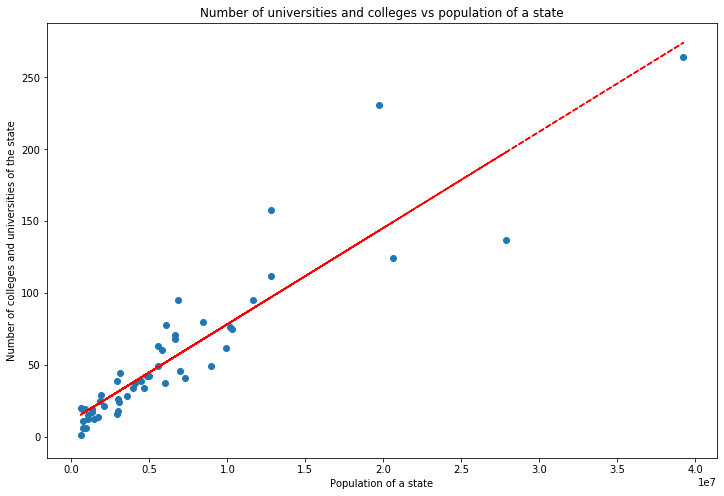

In [33]:
# We plot the number of universities and colleges over the population
plt.figure(figsize=(12,8))
plt.title("Number of universities and colleges vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("Number of colleges and universities of the state")
z = np.polyfit(df_education.Population, df_education.N_of_colleges_universities, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.N_of_colleges_universities) 

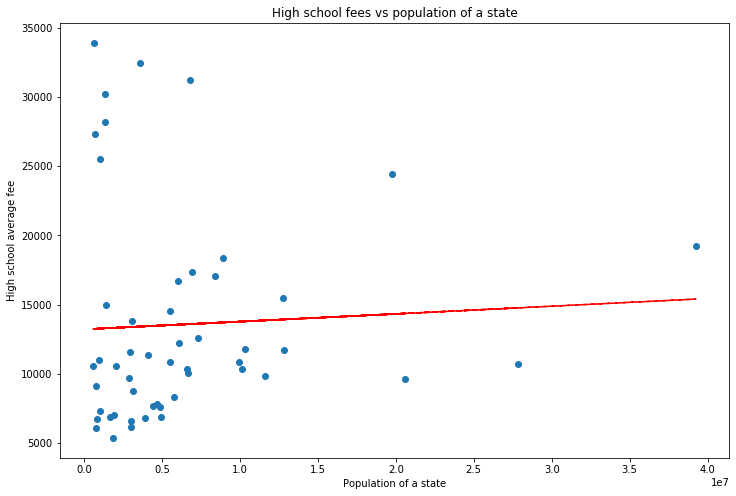

In [34]:
# We do the same for the High school fees
plt.figure(figsize=(12,8))
plt.title("High school fees vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("High school average fee")
z = np.polyfit(df_education.Population, df_education.High_School_Fee, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.High_School_Fee) 

We can see that in the first case we can see a clear correlation between the two quantities, while in the second case there isn't.
We can consider as clearly extensive the first three features we have considered (Number of colleges and universities, Number of junior colleges, Number of professional schools).
But what about the top-230-ranking score?
Of course, it is influenced by the total number of universities: if there are more universities, it is more probable that many will be in the top 230. But the score is not barely related to the number of universities present in the ranking: will we find a meaningful correlation?
Let's plot this index in function of the population!

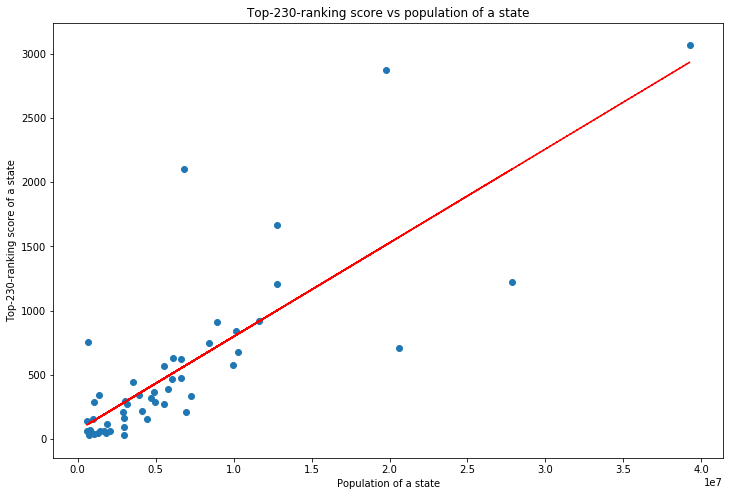

In [35]:
# We plot the top-230-ranking scorse vs the population
plt.figure(figsize=(12,8))
plt.title("Top-230-ranking score vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("Top-230-ranking score of a state")
z = np.polyfit(df_education.Population, df_education.top_230_ranking_score, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.top_230_ranking_score) 

The relation seems to be meaningful! We can consider this quantity as extensive, and therefore we need to normalize it in function of the population!
Let's normalize our quantities!

In [36]:
# We calculate the normalized quantities we need
df_education_norm = df_education.copy()
df_education_norm['Colleges_universities_per_1000000'] = (df_education.N_of_colleges_universities)/(df_education.Population)*1000000
df_education_norm['Junior_colleges_per_1000000'] = (df_education.N_of_junior_colleges)/(df_education.Population)*1000000
df_education_norm['Prof_schools_per_1000000'] = (df_education.N_of_technical_trade_schools)/(df_education.Population)*1000000
df_education_norm['Intensive_top_230_score'] = (df_education.top_230_ranking_score)/(df_education.Population)*1000000
df_education_norm.head()

,State,Population,N_of_colleges_universities,N_of_junior_colleges,N_of_technical_trade_schools,awards_per_value,exp_award_value,top_230_ranking_score,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score
0,alabama,4863300,42.0,36.0,16.0,19.514493,63013.173913,366,7633,6388,8.636111,7.402381,3.289947,75.257541
1,alaska,741894,6.0,1.0,2.0,18.414286,141431.142857,29,6118,7544,8.087409,1.347901,2.695803,39.089142
2,arizona,6931071,46.0,43.0,42.0,25.563492,47830.888889,209,17339,6300,6.636781,6.203947,6.059670,30.154070
3,arkansas,2988248,26.0,26.0,32.0,21.970833,51132.479167,96,6580,4724,8.700750,8.700750,10.708616,32.125848
4,california,39250017,264.0,191.0,239.0,22.771429,63022.202857,3064,19235,11360,6.726112,4.866240,6.089169,78.063660


In [38]:
# Now we keep only the intensive quantities we need
df_education_final = df_education_norm[['State', 'awards_per_value', 'exp_award_value', 'High_School_Fee', 
                                        'Elementary_School_Fee', 'Colleges_universities_per_1000000', 
                                        'Junior_colleges_per_1000000', 
                                        'Prof_schools_per_1000000', 'Intensive_top_230_score']]
df_education_final.head()

,State,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score
0,alabama,19.514493,63013.173913,7633,6388,8.636111,7.402381,3.289947,75.257541
1,alaska,18.414286,141431.142857,6118,7544,8.087409,1.347901,2.695803,39.089142
2,arizona,25.563492,47830.888889,17339,6300,6.636781,6.203947,6.059670,30.154070
3,arkansas,21.970833,51132.479167,6580,4724,8.700750,8.700750,10.708616,32.125848
4,california,22.771429,63022.202857,19235,11360,6.726112,4.866240,6.089169,78.063660


We have created now some new intensive features that are of course more useful! 
- *Colleges and universities per 1 million inhabitants*: it mantains a positive meaning, more schools are there per million inhabitants, the more the education system is efficient!
- *Junior colleges per 1 million inhabitants*: same as before!
- *Professional schools per 1 million inhabitants*: same as before!
- *Intensive top-230-ranking score*: calculated dividing the previous score by the number of inhabitants and multiplying the obtained number per 1000000, in order to have a decent value of score for each state.

Now we have some **positive** features:
- *Number of graduations per 100 students*;
- *Institutional expenditure per graduation*;
- *Intensive top-230-ranking score*
- *Colleges and universities per 1 million inhabitants*;
- *Junior colleges per 1 million inhabitants*;
- *Professional schools per 1 million inhabitants*.

Let's see if normalizing these features and plotting them, we obtain a sort of common trend!

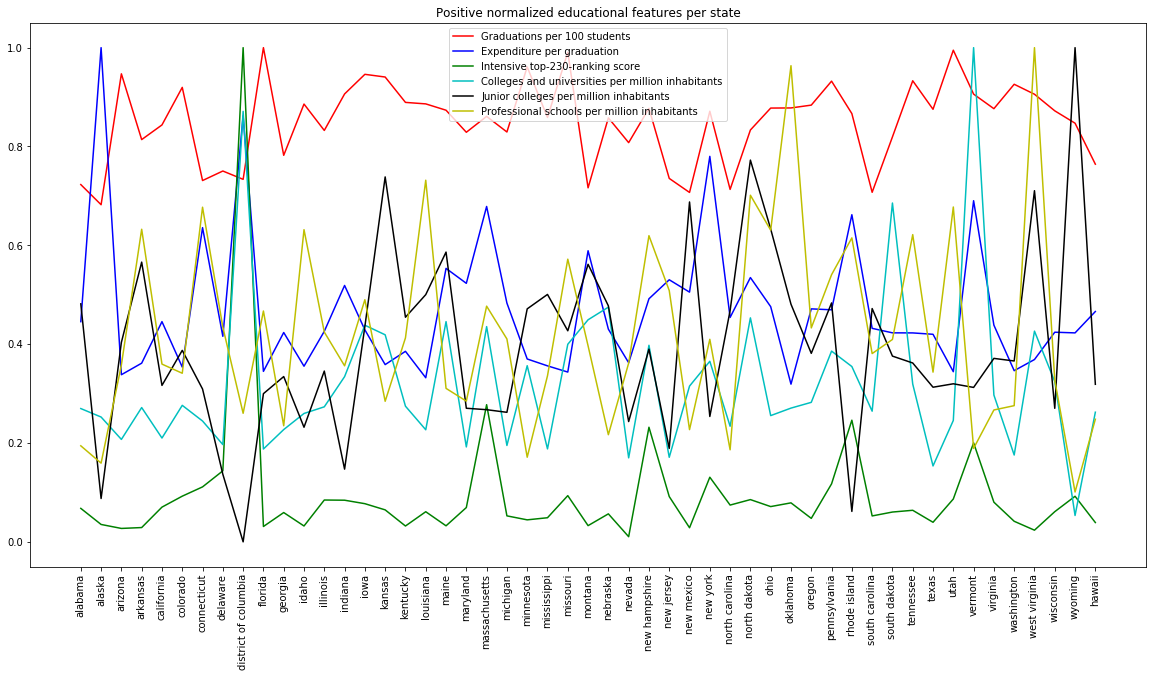

In [39]:
# We plot the positive obtained
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Positive normalized educational features per state")
plt.plot(df_education_final.State, 
         (df_education_final.awards_per_value)/(df_education_final.awards_per_value.max()), 'r') 
plt.plot(df_education_final.State, 
         (df_education_final.exp_award_value)/(df_education_final.exp_award_value.max()), 'b') 
plt.plot(df_education_final.State, 
         (df_education_final.Intensive_top_230_score)/(df_education_final.Intensive_top_230_score.max()), 'g')
plt.plot(df_education_final.State, 
         (df_education_final.Colleges_universities_per_1000000)/(df_education_final.Colleges_universities_per_1000000.max()), 'c')
plt.plot(df_education_final.State, 
         (df_education_final.Junior_colleges_per_1000000)/(df_education_final.Junior_colleges_per_1000000.max()), 'k')
plt.plot(df_education_final.State, 
         (df_education_final.Prof_schools_per_1000000)/(df_education_final.Prof_schools_per_1000000.max()), 'y')
plt.gca().legend(('Graduations per 100 students', 'Expenditure per graduation',
                  'Intensive top-230-ranking score', 'Colleges and universities per million inhabitants',
                  'Junior colleges per million inhabitants', 'Professional schools per million inhabitants'))

We can notice District of Columbia is the absolute champion (except for junior colleges, there is none in D.C.)! But we can see other states have good results in all categories (Massachussets, New York, Vermont, Rhode Island, West Virginia...)!
In spite of this, in general we cannot see a common trend, and in many cases we can notice that the number of junior colleges per million inhabitants seems to be a negative feature!

What about the negative features? We have now 2 negative features:
- *High school average fee*;
- *Elementary school average fee*.

Let's plot these negative features!

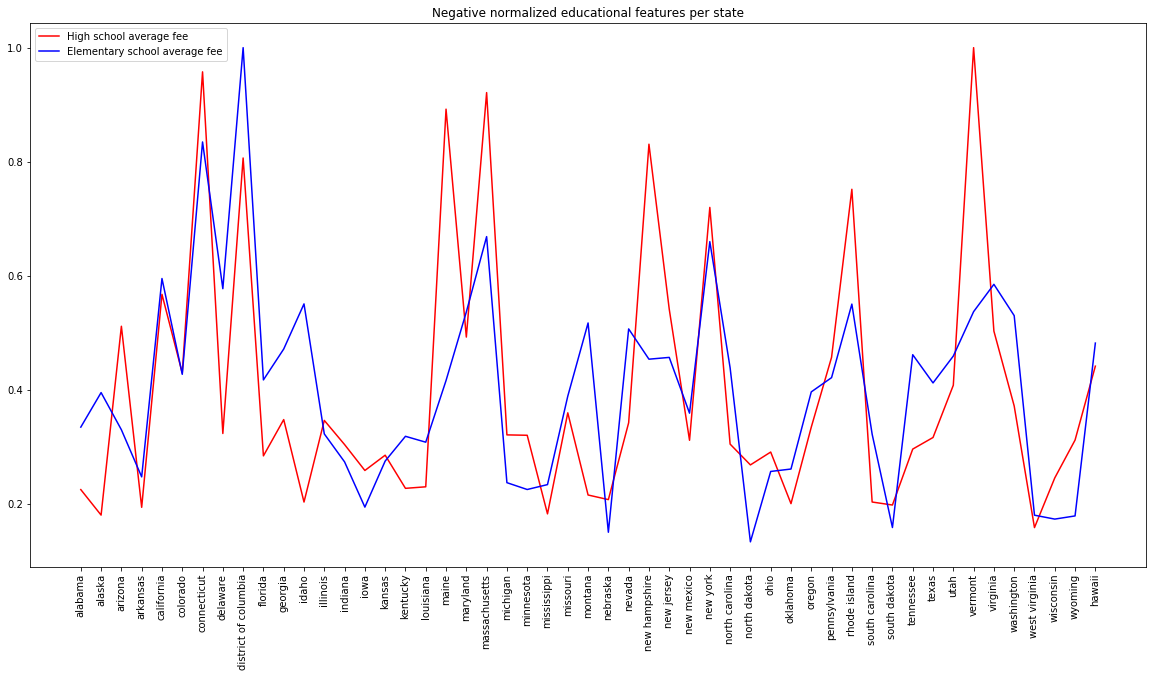

In [40]:
# We plot the negative obtained
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Negative normalized educational features per state") 
plt.plot(df_education_final.State, 
         (df_education_final.High_School_Fee)/(df_education_final.High_School_Fee.max()), 'r')
plt.plot(df_education_final.State, 
         (df_education_final.Elementary_School_Fee)/(df_education_final.Elementary_School_Fee.max()), 'b')
plt.gca().legend(('High school average fee', 'Elementary school average fee'))

In this case we can see a more common trend, but some states that were excellent considering the positive features have also high negative features (for instance, District of Columbia, Massachussets, Vermont).
As said, these two parameters are of course "ambiguous", as we can consider them with a negative and a positive meaning, but we are still convinced a good education is an education with excellent references, but also that is affordable to everyone!
That is why these two features are considered as negative, even if in general they are positively correlated with a good level of education!

In [41]:
df_education_final.corr()

,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score
awards_per_value,1.000000,-0.462936,0.004965,-0.248028,0.043906,0.123325,0.281275,-0.157829
exp_award_value,-0.462936,1.000000,0.519460,0.499588,0.422604,-0.409821,-0.229220,0.516166
High_School_Fee,0.004965,0.519460,1.000000,0.682206,0.387241,-0.333265,-0.063328,0.498121
Elementary_School_Fee,-0.248028,0.499588,0.682206,1.000000,0.166457,-0.585291,-0.084267,0.581427
Colleges_universities_per_1000000,0.043906,0.422604,0.387241,0.166457,1.000000,-0.093338,-0.037426,0.556551
Junior_colleges_per_1000000,0.123325,-0.409821,-0.333265,-0.585291,-0.093338,1.000000,0.079080,-0.379707
Prof_schools_per_1000000,0.281275,-0.229220,-0.063328,-0.084267,-0.037426,0.079080,1.000000,-0.054709
Intensive_top_230_score,-0.157829,0.516166,0.498121,0.581427,0.556551,-0.379707,-0.054709,1.000000


### Things we still need to do
- Implement a ML model on our normalized features to obtain an "education" score
- Once this score is calculated, generate a map showing the education score for each state

## Health

In [42]:
# We create the "health" DataFrame basing on the final DataFrame of milestone 2
df_health = df[health_list]
df_health.head()

,State,Population,Life_Expectancy,mc_donalds_per_100k,adult_obesity_rate,eating_vegetables_daily,Vegetable,diabetes_prevalence,alcohol_prevalence,mean_physical_activity,mean_obesity
0,alabama,4863300,74.813987,5.0,34.7,27.8,1.5,16.19,43.6,45.75,39.75
1,alaska,741894,78.915541,4.2,29.4,18.9,1.8,11.89,59.5,58.70,35.70
2,arizona,6931071,78.364742,4.1,26.7,20.5,1.7,13.72,55.8,58.20,33.10
3,arkansas,2988248,75.626900,5.8,34.6,28.1,1.5,15.23,43.7,48.25,38.25
4,california,39250017,80.231014,3.3,22.7,18.6,1.8,14.51,56.5,60.25,31.15


For our **Health** category we have the following features
- *Life expectancy at birth* in 2015: of course, the longer the life expectancy, the higher the level of health of each state is supposed to be;
- *Number of McDonalds shops per 100000 inhabitants* in each state: McDonalds has always been considered as the example of bad nutrition habits. Of course, this is not immediately true, a McDo a month is not that unhealty (and sometimes is a real mood booster!) but in general, more McDonalds shops mean more people eating regularly there and this is correlated with bad habits, leading to alimentary disorders;
- *Adult obesity rate*: people are generally considered obese when their body mass index (BMI), a measurement obtained by dividing a person's weight by the square of the person's height, is over 30 kg/m^2 [2]. Obesity is a severe health problem, as it is supposed to cause several problems, as diabetes, cardiovascular diseases and finally death. This problem is particularly true in a country like USA, generally considered as the evil of nutrition. It is not a case that in 2013 several medical societies, including the American Medical Association and the American Heart Association, classified obesity as a disease [2].
- *Mean obesity rate*, considering not only adults, but also children;
- *Percentage of people not eating vegetables daily*: on the opposite side od McDo, vegetables are considered as the example of good nutrition. Once again, this is not true, but in general people who eat vegetables daily tend to be more careful to what they eat!
- *Average number of vegetable portions eaten daily per person*;
- *Rate of people suffering from diabetes* per state: diabetes is closely linked to obesity and is one of the most important causes of death in Western world. This is again one of the more severe health problems in US;
- *Alcohol prevalence* in 2012: rate of people who declared they drank at least one alcoholic beverage in the last 30 days; alcohol is once again related to obvious (direct and indirect) health problems;
- *Physical activity prevalence* in 2012: rate of people who is physically active daily. Physical activity is linked to a healthy lifestyle and therefore to a better life.

Let's start looking at the correlation of all of these features with the population of a state. As seen, all the collected features should be intensive features, so we do not expect a high level of correlation with the number of inhabitants.

In [43]:
pd.DataFrame(df_health.corr().Population)

,Population
Population,1.000000
Life_Expectancy,0.050462
mc_donalds_per_100k,-0.190457
adult_obesity_rate,-0.226059
eating_vegetables_daily,-0.088903
Vegetable,0.108450
diabetes_prevalence,0.341886
alcohol_prevalence,-0.009772
mean_physical_activity,-0.009687
mean_obesity,-0.009364


In [44]:
df_health_norm = df_health.drop(columns='Population')
df_health_norm.head()

,State,Life_Expectancy,mc_donalds_per_100k,adult_obesity_rate,eating_vegetables_daily,Vegetable,diabetes_prevalence,alcohol_prevalence,mean_physical_activity,mean_obesity
0,alabama,74.813987,5.0,34.7,27.8,1.5,16.19,43.6,45.75,39.75
1,alaska,78.915541,4.2,29.4,18.9,1.8,11.89,59.5,58.70,35.70
2,arizona,78.364742,4.1,26.7,20.5,1.7,13.72,55.8,58.20,33.10
3,arkansas,75.626900,5.8,34.6,28.1,1.5,15.23,43.7,48.25,38.25
4,california,80.231014,3.3,22.7,18.6,1.8,14.51,56.5,60.25,31.15


We can split once again our features in **positive** and **negative**.

We can consider as positive:
- *Life expectancy at birth*;
- *Number of vegetable portions eaten daily per person*;
- *Physical activity prevalence*.

Instead we have as negative features:
- *Number of McDonalds shops per 100000 inhabitants*;
- *Percentage of people not eating vegetables daily*;
- *Adult obesity rate*;
- *Mean obesity rate*;
- *Diabetes prevalence*;
- *Alcohol prevalence*.

Now let's look at the correlation between our features: we should see positive features positively correlated each other but not with negative features, and vice versa.

In [45]:
df_health_norm.corr()

,Life_Expectancy,mc_donalds_per_100k,adult_obesity_rate,eating_vegetables_daily,Vegetable,diabetes_prevalence,alcohol_prevalence,mean_physical_activity,mean_obesity
Life_Expectancy,1.000000,-0.603849,-0.736961,-0.571649,0.508934,-0.826542,0.632943,0.785877,-0.752466
mc_donalds_per_100k,-0.603849,1.000000,0.548133,0.415053,-0.386006,0.428956,-0.432726,-0.399183,0.475798
adult_obesity_rate,-0.736961,0.548133,1.000000,0.766348,-0.746858,0.536810,-0.454253,-0.806486,0.942865
eating_vegetables_daily,-0.571649,0.415053,0.766348,1.000000,-0.947860,0.518767,-0.391235,-0.774558,0.743352
Vegetable,0.508934,-0.386006,-0.746858,-0.947860,1.000000,-0.436833,0.371861,0.775138,-0.720079
diabetes_prevalence,-0.826542,0.428956,0.536810,0.518767,-0.436833,1.000000,-0.604388,-0.749479,0.658064
alcohol_prevalence,0.632943,-0.432726,-0.454253,-0.391235,0.371861,-0.604388,1.000000,0.575229,-0.500110
mean_physical_activity,0.785877,-0.399183,-0.806486,-0.774558,0.775138,-0.749479,0.575229,1.000000,-0.837010
mean_obesity,-0.752466,0.475798,0.942865,0.743352,-0.720079,0.658064,-0.500110,-0.837010,1.000000


Even if there are some exceptions (surprisingly, alcohol prevalence seems to be a positive feature) in general these trends are respected!
Going further into the data, we can notice some very high correlations.

The first, obvious, is the one between people who do not eat vegetables and the number of vegetable portions consumed daily per person. Let's look more closely at this correlation.

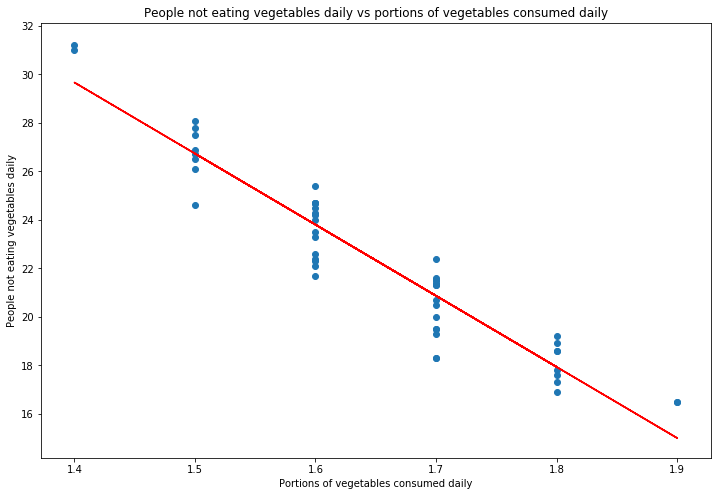

In [46]:
plt.figure(figsize=(12,8))
plt.title("People not eating vegetables daily vs portions of vegetables consumed daily")
plt.xlabel("Portions of vegetables consumed daily")
plt.ylabel("People not eating vegetables daily")
z = np.polyfit(df_health_norm.Vegetable, df_health_norm.eating_vegetables_daily, 1)
p = np.poly1d(z)
plt.plot(df_health_norm.Vegetable,p(df_health_norm.Vegetable),"r--")
plt.scatter(df_health_norm.Vegetable, df_health_norm.eating_vegetables_daily) 

The second strong correlation we can see is the one, still obvious, between the adult obesity rate and the mean obesity rate. This is quite obvious, but we can highlight an important trend.

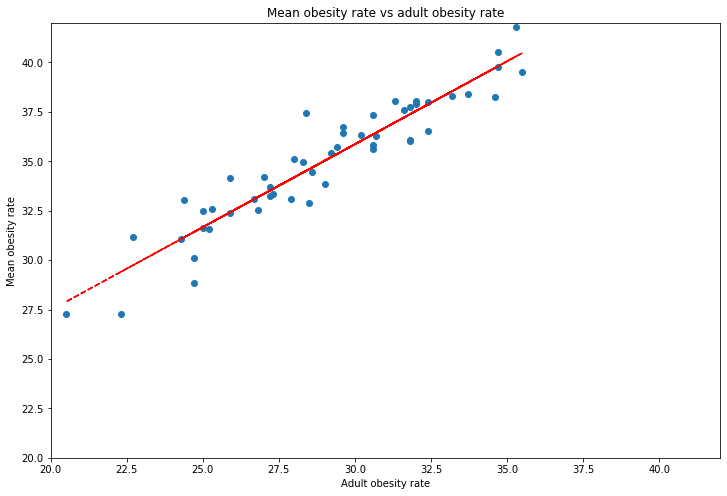

In [47]:
plt.figure(figsize=(12,8))
plt.title("Mean obesity rate vs adult obesity rate")
plt.xlabel("Adult obesity rate")
plt.ylabel("Mean obesity rate")
plt.xlim(20,42)
plt.ylim(20,42)
z = np.polyfit(df_health_norm.adult_obesity_rate, df_health_norm.mean_obesity, 1)
p = np.poly1d(z)
plt.plot(df_health_norm.adult_obesity_rate,p(df_health_norm.adult_obesity_rate),"r--")
plt.scatter(df_health_norm.adult_obesity_rate, df_health_norm.mean_obesity)

We can notice mean obesity rate (involving also children and youngsters) is way higher than adult obesity rate. This is quite worrying: young people in USA tend to be fatter and less healthy than adults, and this trend absolutely needs to be reverted!

These two very strong correlations suggest us we can drop for both couples one of the two features. We decide to drop for the first couple the number of vegetables eaten, as it has more discrete values than the rate of people not eating vegetables daily, and the adult obesity rate, as the mean obesity rate is more representative and comprends also young people.

In [48]:
df_health_final = df_health_norm.drop(columns=['adult_obesity_rate', 'Vegetable'])
df_health_final.head()

,State,Life_Expectancy,mc_donalds_per_100k,eating_vegetables_daily,diabetes_prevalence,alcohol_prevalence,mean_physical_activity,mean_obesity
0,alabama,74.813987,5.0,27.8,16.19,43.6,45.75,39.75
1,alaska,78.915541,4.2,18.9,11.89,59.5,58.70,35.70
2,arizona,78.364742,4.1,20.5,13.72,55.8,58.20,33.10
3,arkansas,75.626900,5.8,28.1,15.23,43.7,48.25,38.25
4,california,80.231014,3.3,18.6,14.51,56.5,60.25,31.15


Now, as seen for the education category, let's see if we can find a coherent trend between all positive features and negative features.

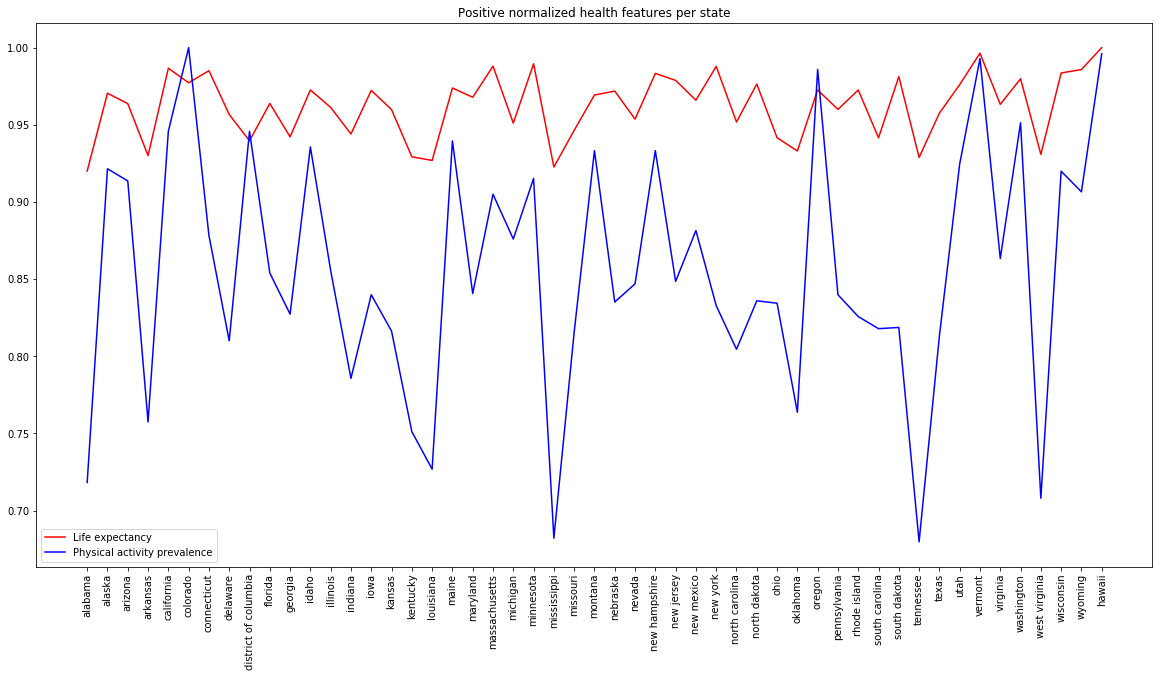

In [49]:
# We plot the positive
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Positive normalized health features per state") 
plt.plot(df_health_final.State, 
         (df_health_final.Life_Expectancy)/(df_health_final.Life_Expectancy.max()), 'r')
plt.plot(df_health_final.State, 
         (df_health_final.mean_physical_activity)/(df_health_final.mean_physical_activity.max()), 'b')
plt.gca().legend(('Life expectancy', 'Physical activity prevalence'))

Even if physical activity prevalence has a more variable range, we can notice a common path between the two positive features! We can see there are some really good states (California, Colorado, Oregon, Utah, Hawaii) and some really negative ones (Alabama, Arkansas, Louisiana, Mississippi, Tennessee, West Virginia).
In general, correlation between these two features still seems to be very strong, as previously seen.

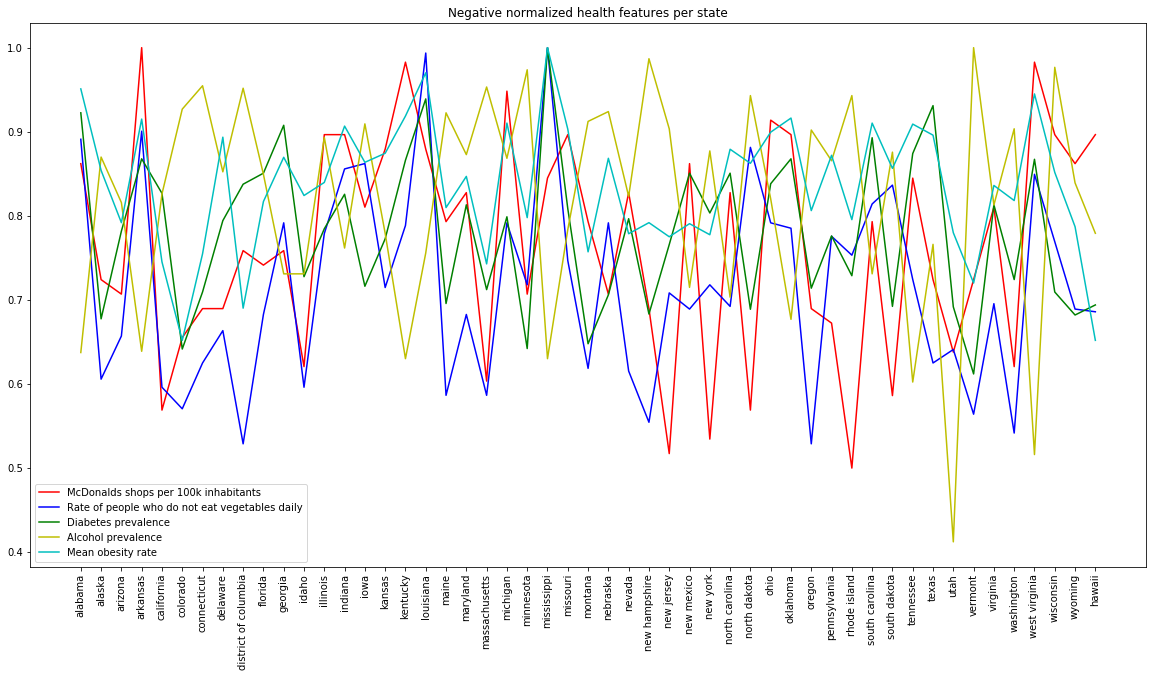

In [62]:
# We plot the negative
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Negative normalized health features per state") 
plt.plot(df_health_final.State, 
         (df_health_final.mc_donalds_per_100k)/(df_health_final.mc_donalds_per_100k.max()), 'r')
plt.plot(df_health_final.State, 
         (df_health_final.eating_vegetables_daily)/(df_health_final.eating_vegetables_daily.max()), 'b')
plt.plot(df_health_final.State, 
         (df_health_final.diabetes_prevalence)/(df_health_final.diabetes_prevalence.max()), 'g')
plt.plot(df_health_final.State, 
         (df_health_final.alcohol_prevalence)/(df_health_final.alcohol_prevalence.max()), 'y')
plt.plot(df_health_final.State, 
         (df_health_final.mean_obesity)/(df_health_final.mean_obesity.max()), 'c')
plt.gca().legend(('McDonalds shops per 100k inhabitants', 'Rate of people who do not eat vegetables daily', 
                  'Diabetes prevalence', 'Alcohol prevalence', 'Mean obesity rate'))

In this case too, we can find a quite common pattern for negative features, except for one: alcohol prevalence (and in some cases rate of people not eating vegetables daily). But let's underline some interesting facts:
- This time the worst states for positive features confirm to be the worst, in the sense that they excell in negative features: Arkansas, Louisiana, Mississippi and West Virginia have very high values of all evaluated negative features (except, as said, alcohol prevalence);
- The same consideration can be done for the best states: California, Hawaii, Oregon, Utah, but this time also Vermont and Washington have low values of all the negative features considered;
- We can see for all features a quite homogeneous distribution except for one: alcohol prevalence! In particular, we can notice two very low values. Curiously, they concern one of the worst states, that is to say West Virginia, and one of the best ones, that is Utah!

Regarding Utah, we can see it is a mainly mormon state (60% of the 88% of christians) [3]. Mormons follow the *Word of Wisdom* revealed by God to Joseph Smith in 1833 [4], that prohibits wine and other alcoholic drinks, hot drinks like tea or coffee and drugs. Due to this healthy revealed lifestyle, we will expect a very high health score for Utah!

Regarding West Virginia, these data are quite strange. As said, it do not seems to be a very healthy state, it does not have any severe regulation for alcohol consumption, nor some religious concerns as Utah. 

### Things we still need to do
- Implement a ML model on our normalized features to obtain an "health" score
- Once this score is calculated, generate a map showing the health score for each state

# Security

In [63]:
# We create the "security" DataFrame basing on the final DataFrame of milestone 2
df_security = df[security_list]
df_security.head()

,State,Population,alcohol_prevalence,"Overall Homeless, 2018",Violent_Crime,Murder_and_Manslaughter,Rape,Robbery,Aggravated_Assoult,Property_crime,Burglary,Theft,Motor_Vehicle_theft
0,alabama,4863300,43.6,3434,532.3,8.4,39.4,96.4,388.2,2947.8,700.5,2006.3,241.1
1,alaska,741894,59.5,2016,804.2,7.0,141.9,114.6,540.6,3353.0,546.3,2394.7,412.1
2,arizona,6931071,55.8,9865,470.1,5.5,47.5,101.8,315.4,2978.4,544.4,2168.1,265.8
3,arkansas,2988248,43.7,2712,550.9,7.2,71.7,70.9,401.0,3268.6,795.5,2233.6,239.4
4,california,39250017,56.5,129972,445.3,4.9,34.9,139.6,265.9,2553.0,479.8,1623.0,450.3


In our **Security** dataframe we have data referring to the following categories:
- *Alcohol prevalence* as seen in our Health section: we can speculate alcohol prevalence is linked to an higher rate of crimes or violent acts, and has therefore a general negative meaning concerning the security of a place;
- *Number of homeless people* in 2018 in each state: this data is linked to different factors, not least the environmental and economic ones, but in general in the common ideas a high number of homeless corresponds to a general feeling of unsecurity; we should evaluate whether this idea is supported by an actual correlation with crimes, but we can still consider this parameter as negative, as we intend as security also the *feeling of security* everybody can perceive;
- *Rate of violent crimes, murders and manslaughters, rapes, robberies, aggravated assoults, porperty crimes, burglaries, thefts and motor vehicle thefts* per 100000 inhabitants in each state, referring to 2016: all these parameters are of course correlated with the intrinsic security of a state in a very negative way; in spite of this, we could speculate some crimes are more negative than others. Our model will have differential weights depending on the kind of crime we are evaluating.

In general, all data we have collected in this category negatively describe the "security attitude" of a state. States who "excell" on these features will have a very low security score!

First of all, we notice we have all intensive data, except for one category: the **number of homeless people**. Let's evaluate if we can effectively notice a correlation between this parameter and the correlation.

In [64]:
df_security.columns = ['State', 'Population', 'alcohol_prevalence', 'Overall_Homeless_2018',
       'Violent_Crime', 'Murder_and_Manslaughter', 'Rape', 'Robbery',
       'Aggravated_Assoult', 'Property_crime', 'Burglary', 'Theft',
       'Motor_Vehicle_theft']

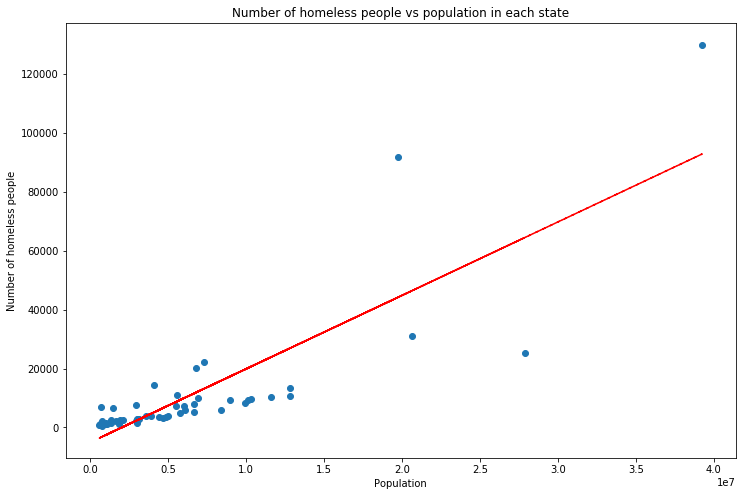

In [65]:
plt.figure(figsize=(12,8))
plt.title("Number of homeless people vs population in each state")
plt.xlabel("Population")
plt.ylabel("Number of homeless people")
z = np.polyfit(df_security.Population, df_security.Overall_Homeless_2018, 1)
p = np.poly1d(z)
plt.plot(df_security.Population,p(df_security.Population),"r--")
plt.scatter(df_security.Population, df_security.Overall_Homeless_2018) 

We need to normalize this parameter! We will evaluate the rate of homeless people per 100000 inhabitants in each state!

In [66]:
# We calculate the normalized quantity we need
df_security_norm = df_security.copy()
df_security_norm['Homeless_per_100000'] = (df_security.Overall_Homeless_2018)/(df_security.Population)*100000
df_security_norm.head()

,State,Population,alcohol_prevalence,Overall_Homeless_2018,Violent_Crime,Murder_and_Manslaughter,Rape,Robbery,Aggravated_Assoult,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Homeless_per_100000
0,alabama,4863300,43.6,3434,532.3,8.4,39.4,96.4,388.2,2947.8,700.5,2006.3,241.1,70.610491
1,alaska,741894,59.5,2016,804.2,7.0,141.9,114.6,540.6,3353.0,546.3,2394.7,412.1,271.736933
2,arizona,6931071,55.8,9865,470.1,5.5,47.5,101.8,315.4,2978.4,544.4,2168.1,265.8,142.330096
3,arkansas,2988248,43.7,2712,550.9,7.2,71.7,70.9,401.0,3268.6,795.5,2233.6,239.4,90.755520
4,california,39250017,56.5,129972,445.3,4.9,34.9,139.6,265.9,2553.0,479.8,1623.0,450.3,331.138710


In [67]:
# Now we keep only the intensive quantities we need
df_security_final = df_security_norm[['State', 'alcohol_prevalence', 'Homeless_per_100000',
       'Violent_Crime', 'Murder_and_Manslaughter', 'Rape', 'Robbery',
       'Aggravated_Assoult', 'Property_crime', 'Burglary', 'Theft',
       'Motor_Vehicle_theft']]
df_security_final.head()

,State,alcohol_prevalence,Homeless_per_100000,Violent_Crime,Murder_and_Manslaughter,Rape,Robbery,Aggravated_Assoult,Property_crime,Burglary,Theft,Motor_Vehicle_theft
0,alabama,43.6,70.610491,532.3,8.4,39.4,96.4,388.2,2947.8,700.5,2006.3,241.1
1,alaska,59.5,271.736933,804.2,7.0,141.9,114.6,540.6,3353.0,546.3,2394.7,412.1
2,arizona,55.8,142.330096,470.1,5.5,47.5,101.8,315.4,2978.4,544.4,2168.1,265.8
3,arkansas,43.7,90.755520,550.9,7.2,71.7,70.9,401.0,3268.6,795.5,2233.6,239.4
4,california,56.5,331.138710,445.3,4.9,34.9,139.6,265.9,2553.0,479.8,1623.0,450.3


Now let's evaluate some correlations.
In particular, as said, alcohol prevalence and homeless people rate are the two features of our dataframe that do not refer directly to crimes and therefore to a direct concept of unsecurity, but give more a sense of unsecurity; we need to evaluate and analyze our data to determine if the general ideas of alcoholist and homeless people as violent is confirmed.
Let's evaluate this correlation.

In [68]:
df_security_final.corr()[['alcohol_prevalence', 'Homeless_per_100000']]

,alcohol_prevalence,Homeless_per_100000
alcohol_prevalence,1.000000,0.291737
Homeless_per_100000,0.291737,1.000000
Violent_Crime,-0.126890,0.508317
Murder_and_Manslaughter,-0.227256,0.380508
Rape,-0.034849,0.255368
Robbery,0.048157,0.682724
Aggravated_Assoult,-0.218572,0.322884
Property_crime,-0.328195,0.392626
Burglary,-0.587890,-0.219435
Theft,-0.215931,0.518825


Once again, alcohol does not seem to have a negative meaning, as evaluated yet in our health analysis; it's strange to say, but in general alcohol prevalence has low correlation, or even negative correlation, with the most general crimes.

We can find instead meaningful correlations between the rate of homeless people and crimes; in general, but particularly concerning **robberies**. This correlation can be quite easily explained in causal terms: in fact, homeless people, who live in poverty and basically relying on alms and charity, could be pushed by the necessity of eating and survive to commit robberies or thefts. Let's look more closely to this aspect.

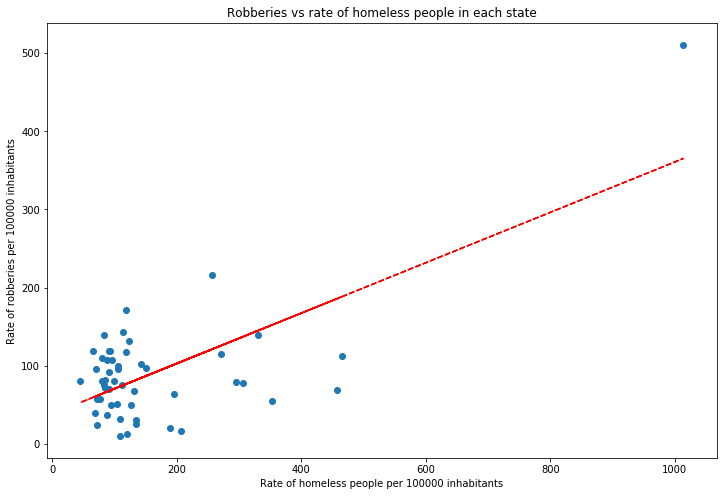

In [69]:
plt.figure(figsize=(12,8))
plt.title("Robberies vs rate of homeless people in each state")
plt.xlabel("Rate of homeless people per 100000 inhabitants")
plt.ylabel("Rate of robberies per 100000 inhabitants")
z = np.polyfit(df_security_final.Homeless_per_100000, df_security_final.Robbery, 1)
p = np.poly1d(z)
plt.plot(df_security_final.Homeless_per_100000,p(df_security_final.Homeless_per_100000),"r--")
plt.scatter(df_security_final.Homeless_per_100000, df_security_final.Robbery) 

We can notice in particular one state that has a very high value for both rates: let's see which state it is.

In [70]:
df_security_final.sort_values(['Homeless_per_100000'], ascending=False).head(2)

,State,alcohol_prevalence,Homeless_per_100000,Violent_Crime,Murder_and_Manslaughter,Rape,Robbery,Aggravated_Assoult,Property_crime,Burglary,Theft,Motor_Vehicle_theft
8,district of columbia,65.1,1013.550215,1205.9,20.4,78.1,510.9,596.5,4802.9,346.6,4019.8,436.5
31,new york,60.0,465.412281,376.2,3.2,31.7,113.0,228.3,1545.6,201.7,1271.0,72.9


We can see District of Columbia seems to be by far the worst state in terms of security; if we compare it with the second state in terms of homeless people (New York) we can see that for each feature, D.C. has much higher values!
How can this be explained?
- District of Columbia coincides with the city of Washington D.C. and in general criminality is more diffused in big cities rather than in rural areas! That is why it obtains such high rates of crimes!

Now let's look at the correlations between the different kind of crimes. Is it possible to talk of diffused criminality, or are all crimes *statistically independent* between them?
Let's look at it!

In [73]:
df_security_crimes = df_security_final[['Violent_Crime', 'Murder_and_Manslaughter', 'Rape',
                                        'Robbery', 'Aggravated_Assoult', 'Property_crime',
                                        'Burglary', 'Theft', 'Motor_Vehicle_theft']]
df_security_crimes.corr()

,Violent_Crime,Murder_and_Manslaughter,Rape,Robbery,Aggravated_Assoult,Property_crime,Burglary,Theft,Motor_Vehicle_theft
Violent_Crime,1.000000,0.827674,0.592081,0.817911,0.947515,0.730709,0.402822,0.728716,0.584927
Murder_and_Manslaughter,0.827674,1.000000,0.293746,0.837320,0.706884,0.655447,0.406297,0.681140,0.342179
Rape,0.592081,0.293746,1.000000,0.244174,0.611924,0.510811,0.264841,0.484059,0.542252
Robbery,0.817911,0.837320,0.244174,1.000000,0.602032,0.579583,0.137617,0.645100,0.432656
Aggravated_Assoult,0.947515,0.706884,0.611924,0.602032,1.000000,0.689667,0.495571,0.649118,0.555113
Property_crime,0.730709,0.655447,0.510811,0.579583,0.689667,1.000000,0.673415,0.962122,0.778811
Burglary,0.402822,0.406297,0.264841,0.137617,0.495571,0.673415,1.000000,0.477139,0.485301
Theft,0.728716,0.681140,0.484059,0.645100,0.649118,0.962122,0.477139,1.000000,0.671058
Motor_Vehicle_theft,0.584927,0.342179,0.542252,0.432656,0.555113,0.778811,0.485301,0.671058,1.000000


We can notice a quite high correlation between all crimes, even though there are some exceptions. So, we can talk about a sort of **diffused criminality** present in some areas rather than others.
How can we detect which areas are more affected by criminality?
- In general, within cities, crime rates are higher than the average [5]. This finds a quite meaningful confirmation in our data,as the only "fully metropolitan" "state", that is to say D.C., is a sort of "criminality champion";
- on this path, in general smaller cities, far from the biggest metropolitan areas, tend to be less affected to criminality; therefore we expect high rates of crimes from those states (California, New York, New Jersey, Florida, Texas) in which these big metropolitan areas are present;
- different factors like poverty (as seen in the case of homeless people), xenophobia and racial conflicts, and even climate or hours of light per day [6], can influence the criminality rate; we could expect a higher criminality in those states close to the borders (and especially on the southern one, like Texas, New Mexico, Arizona, California), but also in colder states like Colorado or especially Alaska, that has climate and latitude that are similar to some countries of Northern Europe (Sweden, Norway [7]) in which criminality rate is quite high.

To see if these ideas reflect in the reality, let's plot some data!
Let's start with **violent crimes** (murders, rapes, general violent crimes) to see if our idea have a statistical confirmation.

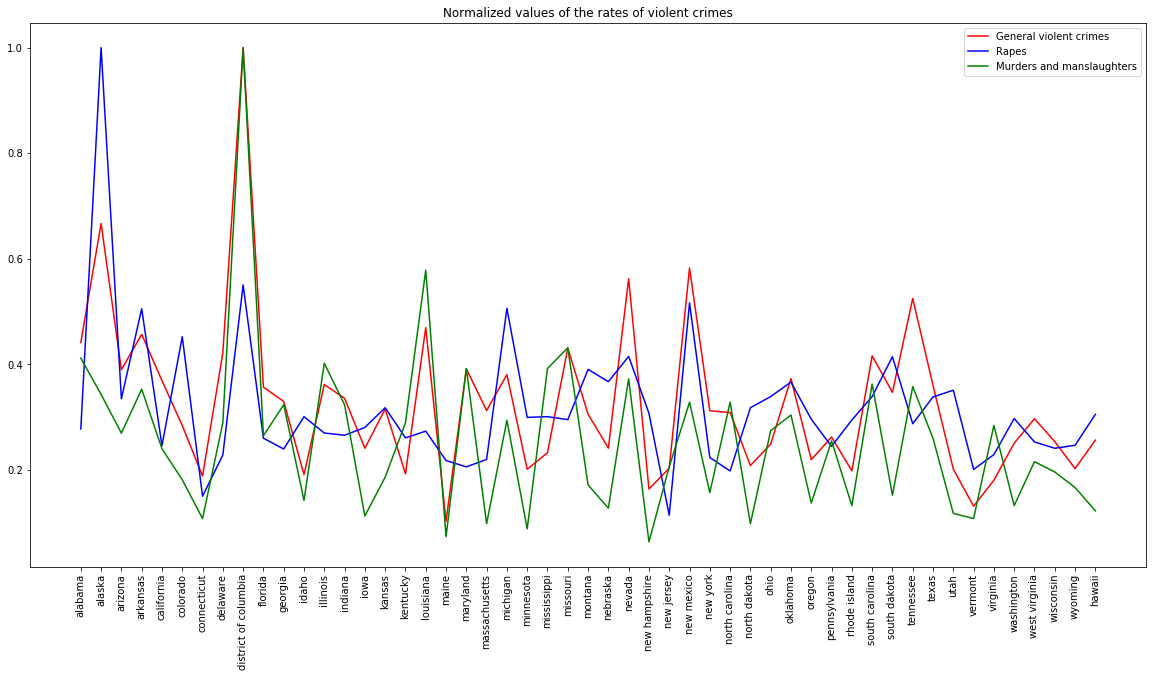

In [75]:
# We plot the normalized rates of violent crimes
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Normalized values of the rates of violent crimes") 
plt.plot(df_security_final.State, 
         (df_security_final.Violent_Crime)/(df_security_final.Violent_Crime.max()), 'r')
plt.plot(df_security_final.State, 
         (df_security_final.Rape)/(df_security_final.Rape.max()), 'b')
plt.plot(df_security_final.State, 
         (df_security_final.Murder_and_Manslaughter)/(df_security_final.Murder_and_Manslaughter.max()), 'g')
plt.gca().legend(('General violent crimes', 'Rapes', 'Murders and manslaughters'))

As previously seen, District of Columbia is the state the most affected by violent crimes, but we can notice a particularly high value of Alaska concerning rapes (and in general regarding violent crimes); some of the states previously listed as possible "criminal" states (like New Mexico or Texas) confirm to be between the worst, but with other unsuspected ones like Louisiana, Nevada, Tennessee.
Some states have instead very low rates of violent crimes, in particular Maine, Connecticut, Idaho.

Let's consider now some **property crimes** in general and going deeper, looking for example at robbery and theft rates.

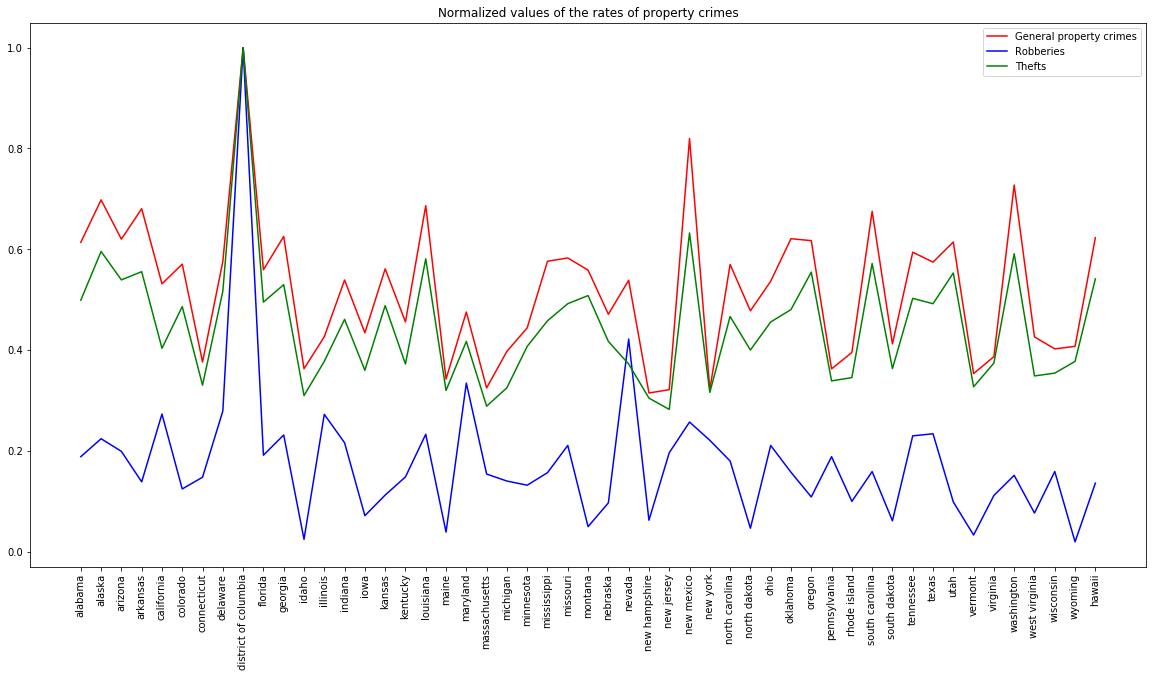

In [76]:
# We plot the normalized rates of property crimes
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Normalized values of the rates of property crimes") 
plt.plot(df_security_final.State, 
         (df_security_final.Property_crime)/(df_security_final.Property_crime.max()), 'r')
plt.plot(df_security_final.State, 
         (df_security_final.Robbery)/(df_security_final.Robbery.max()), 'b')
plt.plot(df_security_final.State, 
         (df_security_final.Theft)/(df_security_final.Theft.max()), 'g')
plt.gca().legend(('General property crimes', 'Robberies', 'Thefts'))

Once again, D.C., Alaska, New Mexico, but also Louisiana, Nevada, Washington, South Carolina or Hawaii have very bad rates of property crimes.
Idaho, Maine, but also North Dakota, South Dakota or Vermont have low rates of property crimes.

In general we can notice all property crimes follow a common pattern, with a couple of exceptions: the most evident one is **California**, that we had evaluated as one of the possible "criminal" states, and instead has in general very low rates about crimes, but with the exception of robberies, which rate is one of the highest in all US.

#### References

[1] https://en.wikipedia.org/wiki/Human_Development_Index
[2] https://en.wikipedia.org/wiki/Obesity
[3] https://en.wikipedia.org/wiki/Utah
[4] https://en.wikipedia.org/wiki/Word_of_Wisdom
[5] https://en.wikipedia.org/wiki/Crime_in_the_United_States
[6] https://link.springer.com/referenceworkentry/10.1007%2F1-4020-3266-8_61
[7] https://en.wikipedia.org/wiki/Crime_in_Norway